<center> <h1>📈 Linear Regression 📈 </h1> </center> 

<p> <center> This notebook is in <span style="color: green"> <b> Active </b> </span> state of development! </center> </p>  
<p> <center> Be sure to checkout my other notebooks for <span style="color: blue"> <b> knowledge, insight and laughter </b> </span>! 🧠💡😂</center> </p> 

<center> <img src="https://www.mihaileric.com/static/linear_regression_joke-9400ea8c70e0500f1934f7a22c86bc68-b75a8.png" width="550" height="550" /> </center> 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Aim

The aim is to provide, from scratch, code implementations for linear regression problems. This will involve both the main functions needed to solve a linear regression and some additional utility functions as well.

**Note**: We will not be diving into in-depth exploratory data analysis, feature engineering etc... in these notebooks and so will not be commenting extensively on things such as skewness, kurtosis, homoscedasticity etc...

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Background

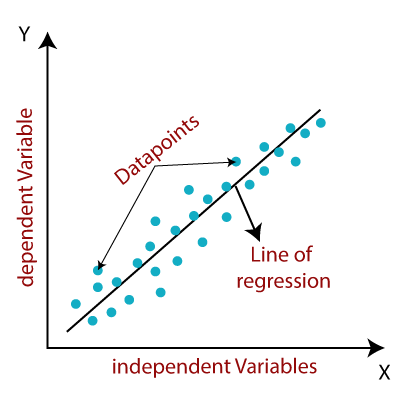

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Code

## Import Modules

In [26]:
# Importing standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## Data Collection

In [2]:
# Import data
df_1 = pd.read_csv('lin_train.csv')
df_2 = pd.read_csv('lin_test.csv')

In [3]:
# Rename columns
df_1.columns = ["Number of Hours Worked", "Income"]
df_2.columns = ["Number of Hours Worked", "Income"]

## Data Processing

In [4]:
# Join data into one dataframe 
df = pd.concat((df_1, df_2), axis=0).reset_index(drop=True)

In [5]:
# Check for Nulls and dtype of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number of Hours Worked  1000 non-null   float64
 1   Income                  999 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
# Check for NaNs
df.isna().sum()

Number of Hours Worked    0
Income                    1
dtype: int64

In [7]:
# Check where the NaN exists
np.where(df.isna())

(array([213]), array([1]))

In [8]:
df.loc[213]

Number of Hours Worked    3530.157369
Income                            NaN
Name: 213, dtype: float64

In [9]:
# Check for duplicates
df.duplicated().sum()

0

**Note:** Make sure that you do not remove lots of datapoints due to the NaN or missing value issues. It may be better to impute them.

In [10]:
# Drop NaNs and duplicates
df = df.dropna().drop_duplicates()

In [11]:
# Overall statistics
df.describe()

,Number of Hours Worked,Income
count,999.000000,999.000000
mean,50.291291,50.319804
std,28.808925,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,74.500000,74.475252
max,100.000000,108.871618


## Data Visualisations

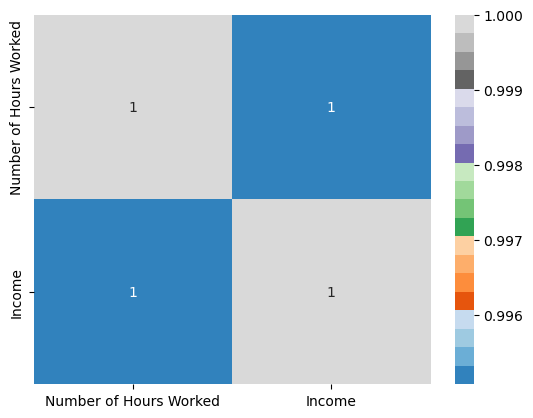

In [12]:
# Check for correlation
sns.heatmap(df.corr(), annot = True, cmap="tab20c");

A value of 1 (positive) suggests to us that there is an exact correlative match between the feature and the target variable and so a linear regression is a perfect fit for this dataset.

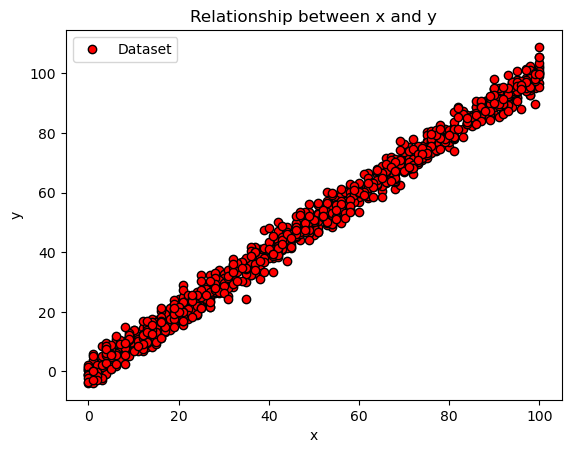

In [13]:
# Plot data
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.plot(df.iloc[:,0],df.iloc[:,1],'ro', mec= 'k');
plt.legend(['Dataset']);

## Splitting dataset

In [14]:
# Separate features and target variable
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [15]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)
# Re-index
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [16]:
# Add ones to the dataframes
m,n = X_train.values.shape
o,p = X_test.values.shape
X_train_aug = pd.concat((pd.DataFrame(np.ones((m, 1)), columns= ['Bias']), X_train), axis=1)
X_test_aug = pd.concat((pd.DataFrame(np.ones((o, 1)), columns= ['Bias']), X_test), axis=1)

In [17]:
# Convert into arrays
X_train_aug = np.asarray(X_train_aug)
y_train = np.asarray(y_train)
X_test_aug = np.asarray(X_test_aug)
y_test = np.asarray(y_test)

## Cost Function

In [30]:
def lr_cost_1(X: Union[pd.DataFrame, np.array], y: Union[pd.Series, np.array], theta: np.array) -> float:

    """Return the Mean Squared Error of a linear regression model using vectorised notation."""

    # Retrieve feature dimensions
    m, n = X.shape 
    # Calculate error 
    residual = y - X @ theta
    # Calculate Cost Function 
    CF_LR = (1/m) * (residual.T @ residual)
    # Return Cost Function
    return CF_LR

In [31]:
def lr_cost_2(X: Union[pd.DataFrame, np.array], y: Union[pd.Series, np.array], theta: np.array) -> float:

    """Return the Mean Squared Error of a linear regression model using loops."""
    
    # Retrieve feature dimensions
    m, n = X.shape 
    # Initialise error
    residual = 0
    # Calculate squared error 
    for i in range(m):
        residual += (y[i] - np.sum(X[:,i] * theta))**2
    # Calculate mean squared error
    CF_LR = np.mean(residual)
    # Return Cost Function
    return CF_LR

## Theta/Co-efficient Estimates

In [23]:
def ls_ne(X: Union[pd.DataFrame, np.array], y: Union[pd.Series, np.array]) -> np.array:
    
    """ Return the maximum likelihood estimate from the normal equations. """
    
    # Calculate estimator theta
    return np.linalg.solve((X.T @ X), X.T @ y)

## Regression Predictions

In [24]:
def predict(X: Union[pd.DataFrame, np.array], y: Union[pd.Series, np.array], theta: np.array) -> Union[np.array, pd.Series]:
    
    """Return model predictions."""
    
    # Calculate predictions
    return X @ theta_estimate

## Full Linear Regression Model

In [27]:
class LinearReg():
    
    def __init__(self):
        
        """Initialise parameters."""
        
        self.theta = None
    
    def fit(self, X: Union[pd.DataFrame, np.array], y: Union[pd.Series, np.array]) -> Union[pd.Series, np.array]:
    
        """Return the maximum likelihood estimate from the normal equations."""

        # Calculate estimator theta
        self.theta = np.linalg.solve((X.T @ X), X.T @ y)

    def predict(self, X: Union[pd.DataFrame, np.array]) -> Union[pd.Series, np.array]:
    
        """Return model predictions."""

        y_pred = X @ self.theta
        # Return predictions
        return y_pred

## Model Testing and Results

In [28]:
# Instantiate model
pop_prof_model = LinearReg()

In [35]:
# Fit model to training dataset to obtain estimates
pop_prof_model.fit(X_train_aug, y_train)
# Obtain predictions for training and test dataset
y_pred_train = pop_prof_model.predict(X_train_aug)
y_pred_test = pop_prof_model.predict(X_test_aug)
# Calculate MSE and R2 score on training and test dataset
MSE_train = lr_cost_1(X_train_aug, y_train, pop_prof_model.theta)
MSE_test = lr_cost_1(X_test_aug, y_test, pop_prof_model.theta)
print("Theta estimates are: {}".format(pop_prof_model.theta))
print("Training dataset mean squared error: {}".format(MSE_train))
print("Test dataset mean squared error: {}".format(MSE_test))
print("Train dataset R2 score: {}".format(r2_score(y_train,y_pred_train)))
print("Test dataset R2 score: {}".format(r2_score(y_test,y_pred_test)))

Theta estimates are: [-0.29654476  1.00523472]
Training dataset mean squared error: 8.08837597693405
Test dataset mean squared error: 9.003332816736533
Train dataset R2 score: 0.9904790394652241
Test dataset R2 score: 0.9891879937675698


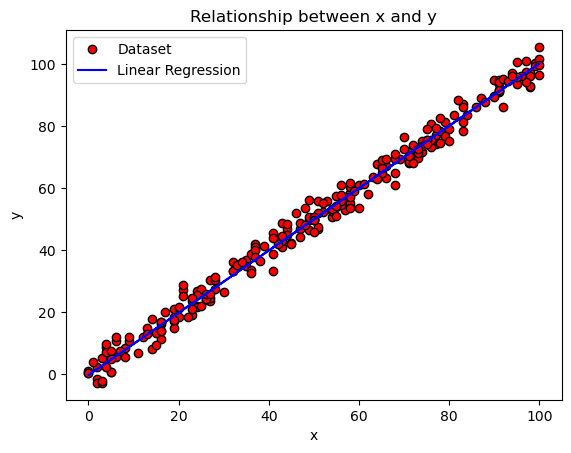

In [38]:
# Plot test data against predictive model
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.plot(X_test,y_test,'ro', mec= 'k');
plt.plot(X_test,y_pred_test,'-b', mec= 'k');
plt.legend(['Dataset', 'Linear Regression']);

## Comparison to Scikit-Learn

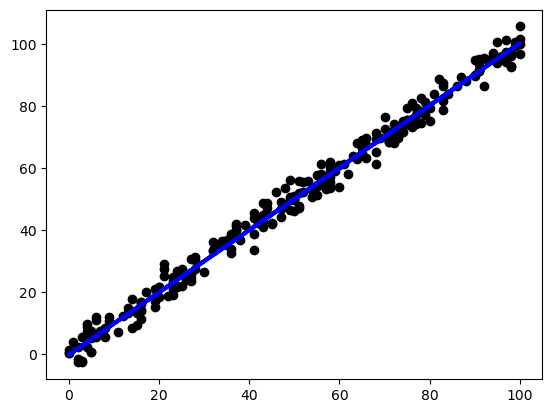

In [39]:
# Fit the model to the data
reg = LinearRegression().fit(X_train, y_train)
# Predict the values for the input data
y_pred = reg.predict(X_test)
# Plot the input data and the model's predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [42]:
# Check coefficients
reg.coef_

array([1.00523472])

# Summary

- The in-sample MSE (training) and out-sample MSE (test) are quite small in value and very close. 
- The out-sample is slightly higher than the in-sample, which may suggest a higher bias of the model as it is has trained/more suited to the training dataset.
- The R2 score is extremely high (near 1) for both training and test set which means that the model nearly explains all the variation in the response variable around its mean.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Extra

To apply feature scaling on the feature dataset:

In [ ]:
def feature_scaling(X: pd.DataFrame) -> pd.DataFrame:
    
    """ Normalises the features in X (dataframe) and returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1. """
    
    # Return normalised data
    return (X - np.mean(X, axis=0))/np.std(X, axis=0, ddof=0)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

Some comments about the code:

1. Here we have created an entire python class for linear regression to make it similar to a machine learning pipeline format. If you would like to just use the functions by themselves, simply take them from the individual sections.
2. We have only dealt with 1 feature in this dataset (simple linear regression) - a mult-linear regression may not yield the same accuracy. 
3. We have not actually used the cost function as a means to optimise the model - we have simply used the normal equations to obtain our estimates.
3. Two alternative methods to solve linear regression problems are: Gradient Descent (Smart Search) (which uses the cost function as an objective function) and Grid Search (Brute Force).

Thank you for reading this notebook. If there are any mistakes or things that need more clarity, feel free to email sidnath01@hotmail.com and I will be happy to reply. 
Additionally, it would be helpful if you cite this documentation if you are going to use any of the code. 😊

© _PolyNath 2023_

<center> <h1> Code With Sid </h1> </center> 